# Introduction to training models
- 3 parts of ML implementation
    - train
    - evaluate
    - 
- src: https://security.kiwi/docs/training-regression-models/

Training - defining factor of a machine learning algorithm allowing a computer program to learn from data without being explicitly programmed

Pre-training - the process of passing a dataset through one type of algorithm before passing it through another type, specifically for the purpose of creating ‘better’ data for the second algorithm to process

### Train a Linear Regression Model

Import packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

Import data

In [5]:
boston = load_boston()
data = pd.DataFrame(boston.data)

data.columns = boston.feature_names
data.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Visualize loaded data

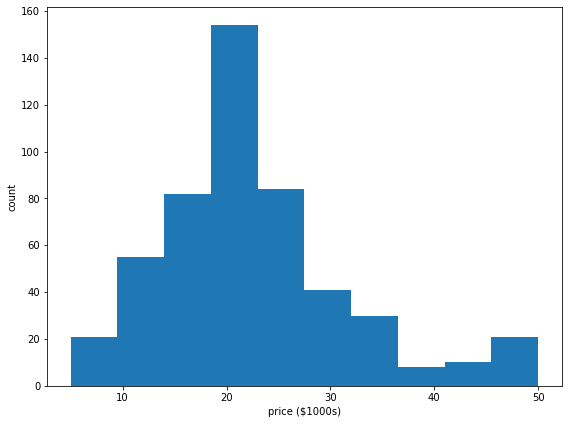

In [7]:
plt.figure(figsize=(8, 6))
plt.hist(boston.target)
plt.xlabel('price ($1000s)')
plt.ylabel('count')
plt.tight_layout()

Assign values - Linear regression requires two independent variables

In [8]:
# add PRICE column filled with prices from boston.target
data['PRICE'] = boston.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [17]:
# remove PRICE column
data = data.drop('PRICE', axis=1)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [18]:
# assign x and y values
x = data
y = boston.target

Split the dataset -  into a training and test datasets, keeping some data aside to test the accuracy of our method after training

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=4)

Train the model

In [20]:
# assign Linear Regression algorithm to a variable
lr = LinearRegression()

# train the model using the training sets
lr.fit(x_train, y_train)

LinearRegression()

Predict prices

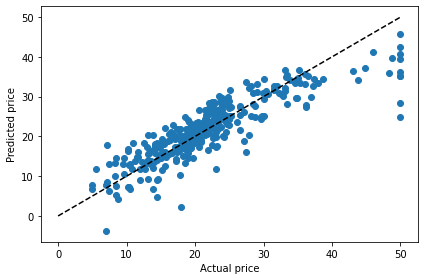

In [28]:
# predict price values
y_pred = lr.predict(x_train)

# plot predictions
plt.figure(figsize=(6,4))
plt.scatter(y_train, y_pred)
plt.plot([0,50],[0,50],'--k')
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.tight_layout()

Evaluate 
- MSE - Mean Squared Error - measures the average squared difference between a predicted value and the actual value
- the lower the value the less the difference between the predicted and actual values and the better the technique

In [29]:
from sklearn import metrics
MSE = metrics.mean_squared_error(y_train, y_pred)
print('MSE: {}'.format(MSE))

MSE: 19.07368870346903
